# Artificial neural networks(ANNs)-Beginners Guide
# Understanding the "Why", "How" and "What" of ANNs

## Introduction to Neural Networks
**Why ANNs?**
- Inspired by biological brains
- Can learn complex patterns from data(everything is all about patterns)
- Power modern AI applications(image recognition, NLP etc.)

**Key Components:**
1. Perceptrons(Basic Building blocks)
2. Activation fuctions(Introduce non-linearity)
3. Layers (Input, Hidden, Output)
4. Loss Functions (Measures model performance)
5. Optimizers (Adjust weights to minimize loss)

## Part 1: Perceptrons-The Building Block
**What is a Perceptron?**
- Simplest neural network architecture(TLU Threshold Logic Unit or LTU)
- Makes decision by weighting inputs
- Learns through error correction

**Why Start with Perceptrons?**
- Foundation for understanding complex networks(KNN, CNN, DNN, ANN)
- Helps grasp basic components of learning algorithms

# Building a machine learning model
## Make sure to have these installed
- numpy
- pandas
- scikit-learn
- tensorflow
- matplotlib

In [ ]:
# If you dont have them installed run this cell
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install tensorflow
!pip install matplotlib

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris

# Load Iris dataset- Why Iris?
# - Simple, well known dataset
# - Good for binary classification demonstration
# - Contains features about some set of flowers

iris = load_iris() # Gets the data to be trained on
X = iris.data[:, (2, 3)] # Why select only 2 features? For visualisation ease you can select more if you like 
y = (iris.target == 0).astype(int) # Binary classification (Setosa or not)
per = Perceptron() # The machine learning model to train the data on
per.fit(X, y) # You have sucessfully built a machine learning model

# Make prediction
sample = [[2, 0.5]] # if you select more features make sure to include them here
print(f"Prediction for {sample} is: {per.predict(sample)}" ) # You have successfully predicted whether the flower with

Prediction for [[2, 0.5]] is: [0]


**Feature Scatter Plot : This plot will show the distribution of the two selected features (petal length and petal width) for the two classes (Setosa vs. Non-Setosa).**

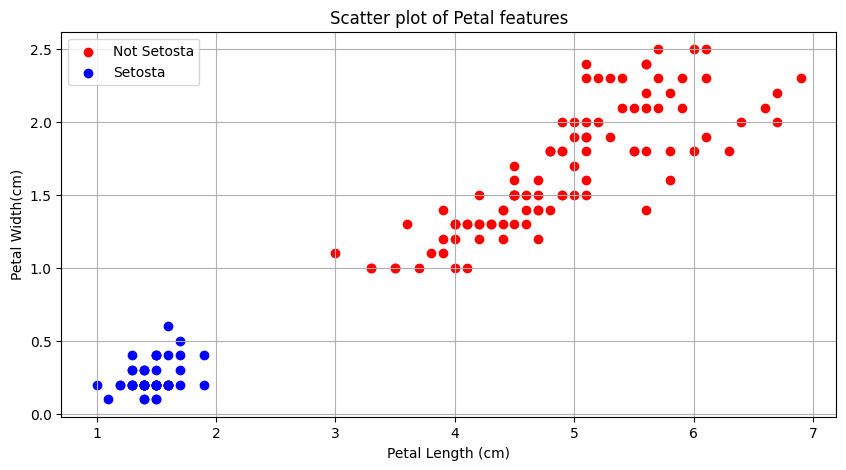

In [2]:
import matplotlib.pyplot as plt # For plotting
from matplotlib.colors import ListedColormap 


plt.figure(figsize=(10, 5)) # Defines the size of the plot for better visualisation

# Plots the two classes with distinct colors and labels
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="red", label="Not Setosta") 
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="blue", label="Setosta")

# Add labels and legend
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width(cm)")
plt.title("Scatter plot of Petal features")
plt.legend()
plt.grid(True)
plt.show()

## Extra Code explanation 
**X[y == 0][:, 0] This selects where the flower is non setosta(y == 0) and then selects the first row corresponding to that([:, 0])**

**Decision Boundary Plot : This plot will show the decision boundary learned by the Perceptron model and how it separates the two classes.**

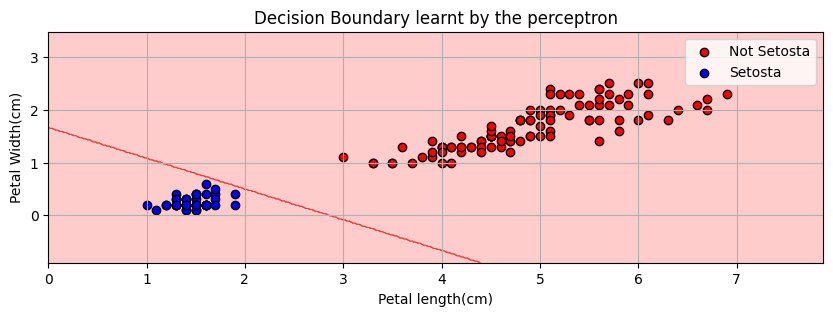

In [3]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                    np.arange(y_min, y_max, 0.02))

# Predict the class for each point on the meshgrid
Z = per.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 3))
plt.contourf(xx, yy, Z, alpha=0.2, cmap=ListedColormap("red", "blue"))

# The scatter plot
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Not Setosta", color="red", edgecolors="k")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Setosta", color="blue", edgecolors="k")

# Add labels and legend
plt.xlabel("Petal length(cm)")
plt.ylabel("Petal Width(cm)")
plt.title("Decision Boundary learnt by the perceptron")
plt.grid(True)
plt.legend()
plt.show()

## Explanation of the code block
**x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1**
- X[:, 0] selects the first row petal length
- X[:, 1] selects the second row petal width
- x_min and x_max defines the range of the first feature by extending the minimum and maximum values by the unit of 1
- Purpose: Just for better visualization because it ensures that the plot includes all data points and provides some padding around the edges

**xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                    np.arange(y_min, y_max, 0.02))**
- np.arange(x_min, x_max, 0.02) creates an array of evenly spaced values between x_min and x_max with a step size of 0.02
- np.meshgrid generates two 2D arrays (xx and yy) that represent a grid of points covering the entire feature space defined by x_min, x_max, y_min, and y_max.
- Purpose : The meshgrid creates a fine grid of points over the feature space, allowing us to evaluate the model's predictions at every point.
  
**Z = per.predict(np.c_[xx.ravel(), yy.ravel()])**
- xx.ravel() flattens the xx array into a 1D array e.g(100 X 100 becomes 10,000).
- np.c_[xx.ravel(), yy.ravel()] combines the flattened xx and yy arrays(column wise) into a single 2D array where each row represents a point (x, y) on the grid.
- per.predict(...) applies the trained model (per) to predict the class label for each point in the grid.
- Purpose : This step evaluates the model's prediction for every point in the feature space, effectively determining which class each point belongs to.

**Z = Z.reshape(xx.shape)**
- Z.reshape(xx.shape) reshapes the 1D array of predictions back into a 2D array with the same shape as xx and yy.
- Purpose : Reshaping ensures that the predictions can be overlaid on the original feature space grid for visualization.


## Part 2: Introduction to keras/TensorFlow
**Why Use Deep Learning Frameworks(Multiple layer Perceptron)?**
- Simplify network architecture creation
- Automatic Differentiation(Back propagation)
- GPU acceleration support
- Prebuilt layers and utilities

**Fashion MNIST Overview:**
- 70k grayscale images (28x28 pixels)
- 10 clothing categories
- Better test of ANN capabilities than MNIST


In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist # imports the dataset to be trained on

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data() # gets the data set and splits it respectively
# Why split into train/validation/test?
# - Prevent overfitting
# - True performance measurement

X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:] # Splits the data accordingly for training
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]


X_train, X_valid, X_test = X_train/255., X_valid/255., X_test/255. # Normalizes the data

# Visualising the Data

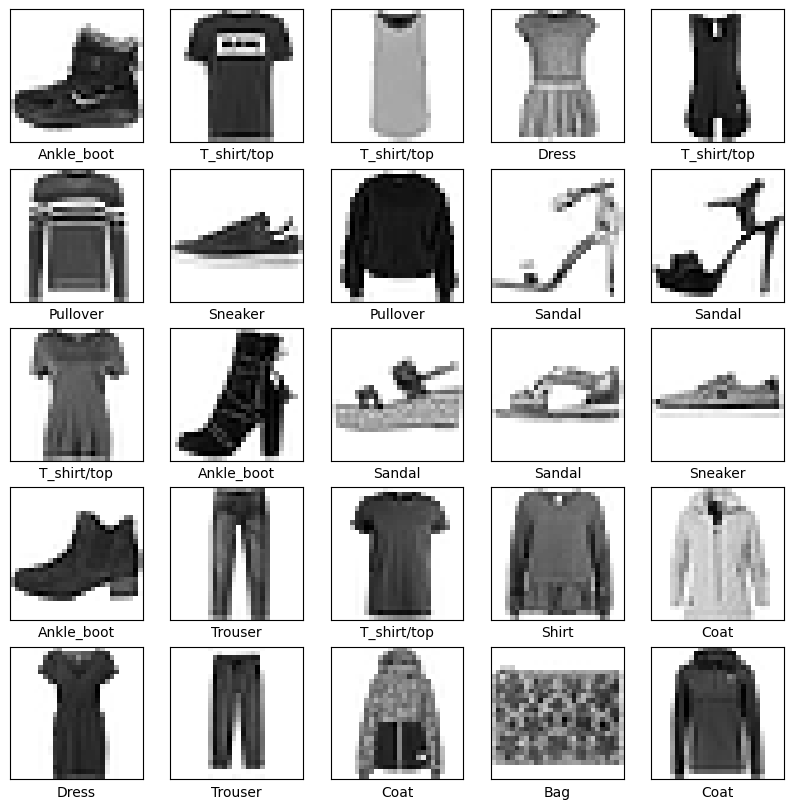

In [5]:
import matplotlib.pyplot as plt

class_names = [
    "T_shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle_boot"
    ]
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

# Building a Neural Network with keras using the Sequential API
# A.K.A Building your own AI to classify images
**Model Architecture Decisions**
1. Flatten layer: Convert 28x28 image to 1d array(784 pixels)
2. Dense Layer: Fully connected layers
3. ReLu Activation: Introduces non_linearity
4. Softmax Output: Probablity distribution over 10 classes


In [6]:
# 1
from keras.models import Sequential
from keras.layers import Flatten, Dense, InputLayer

# 2
model = Sequential([
    InputLayer(shape=[28, 28]),
    Flatten(),
    Dense(300, activation="relu"),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax"),
])

# 3
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

# 4
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid)) # Congrats you have just successfully built your own AI :)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6788 - loss: 1.0090 - val_accuracy: 0.7968 - val_loss: 0.5539
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8241 - loss: 0.5098 - val_accuracy: 0.7998 - val_loss: 0.5256
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.8425 - loss: 0.4503 - val_accuracy: 0.8414 - val_loss: 0.4367
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8539 - loss: 0.4163 - val_accuracy: 0.8562 - val_loss: 0.3982
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8580 - loss: 0.4036 - val_accuracy: 0.8548 - val_loss: 0.4020
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8683 - loss: 0.3753 - val_accuracy: 0.8596 - val_loss: 0.3793
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8681 - loss: 0.3688 - val_accuracy: 0.8692 - val_loss: 0.3690
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8775 - loss: 0.34

## Code Explanation
**from keras.models import Sequential from keras.layers import Flatten, Dense, InputLayer**
- Sequential : A linear stack of layers where you can add one layer at a time.
- Flatten : Converts a 2D array (e.g., 28x28 image) into a 1D array (e.g., 784 pixels).
- Dense : Fully connected layers where each neuron is connected to every neuron in the previous layer.
- InputLayer : Specifies the input shape of the data.

**#2**
- InputLayer(shape=[28, 28]) : 
Specifies the input shape of the images: 28x28 pixels (grayscale)
- Dense(300, activation="relu") : 
Adds a hidden layer with 300 neurons and ReLU (Rectified Linear Unit) activation, which introduces non-linearity
- Dense(100, activation="relu") : 
Adds another hidden layer with 100 neurons and ReLU activation
- Dense(10, activation="softmax") : 
Adds the output layer with 10 neurons (one for each class in Fashion MNIST) and softmax activation, which outputs probabilities for each clas
- Purpose : This defines a simple feedforward neural network architecture suitable for multi-class classification.

**#3**
- loss="sparse_categorical_crossentropy" : 
Defines the loss function for multi-class classification when labels are integers (not one-hot encoded).
- optimizer="sgd" : 
Specifies Stochastic Gradient Descent (SGD) as the optimization algorithm to minimize the loss.
- metrics=["accuracy"] : 
Tracks the accuracy of the model during training and validation

- Purpose : Prepares the model for training by specifying how it will learn and evaluate performance.

**#4**
- Purpose : Trains the model on the training data while monitoring its performance on the validation set..
nce.


.
..


# Key concepts explained
**Why ReLU Activation**
- Solves vanishing gradient problem
- Computationally efficient
- Sparse activation

**Why Softmax for Output?**
- Converts logits to probabilities
- Suitable for multi-class classification

**Understanding Epochs**
- one epoch = one full pass through the training data
- Too few: Underfitting
- Too many: Overfitting

**Validation split**
- Monitors model performance on unseen data
- Helps detect overfitting early



## Key take aways 
1. **Perceptron** are fundamental building blocks
2. **Deep Learning frameworks** simplify implementation
3. **Data Preprocessing** is crucial for success
4. **Model Architecture** choices impact performance 
5. **Validation** Prevents overfitting 

# Using the AI model to make predictions(Classify Images)

In [8]:
# Selects the first three images from the data set and make predictions
x_new = X_test[:3]
y_proba = model.predict(x_new)
y_proba

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


array([[5.4391953e-06, 4.1591434e-08, 8.5805241e-06, 7.6369656e-07,
        1.9071261e-06, 2.1322970e-03, 1.2001334e-05, 3.3167729e-03,
        5.9913062e-05, 9.9446231e-01],
       [1.7410153e-05, 1.2606738e-08, 9.9052471e-01, 5.4906764e-08,
        7.1988497e-03, 2.8307428e-09, 2.2588891e-03, 8.8564442e-12,
        2.9547019e-08, 2.7604033e-10],
       [3.0443614e-06, 9.9999583e-01, 5.1843106e-08, 5.1829687e-07,
        5.1075364e-07, 1.0308787e-13, 4.6247003e-08, 6.4906808e-10,
        3.3646050e-10, 1.9225972e-11]], dtype=float32)

In [9]:
print(y_proba.round(2)) # Displays the prob in 2 decimal place 
y_pred = y_proba.argmax(axis=-1) # Finds the index of the highest probability in each row
print(f"predictions: {y_pred}") 

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.99]
 [0.   0.   0.99 0.   0.01 0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
predictions: [9 2 1]


In [10]:
print(f"names: {np.array(class_names)[y_pred]}") # To get their actual names

names: ['Ankle_boot' 'Pullover' 'Trouser']


In [11]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

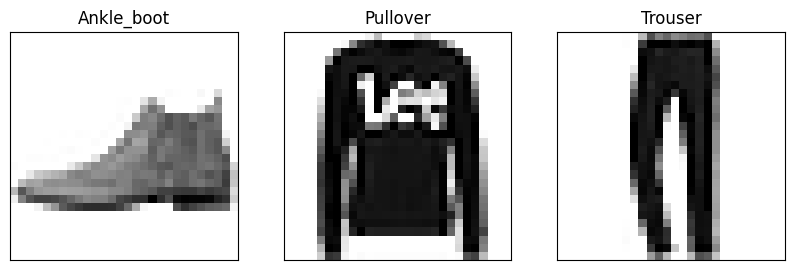

In [12]:
plt.figure(figsize=(10, 10)) # Creates a figure with a specified size for displaying the images.
for index, image in enumerate(x_new): # Iterates over the three test images (x_new) and their indices.
    plt.subplot(1, 3, index+1) # Creates a subplot grid with 1 row and 3 columns, placing each image in one subplot.
    plt.imshow(image, cmap="binary", interpolation="nearest") # Displays the grayscale image using a binary colormap
    plt.xticks([]) # Removes axis ticks
    plt.yticks([])
    plt.title(class_names[y_pred[index]]) # sets the title of each subplot to the predicted class name.

plt.show()   

The AI model has sucessfully classified the images :)

## Want to Learn More? Follow Me on X! 🚀  

If you found this guide helpful and want to learn more about AI, machine learning, and building real-world models, follow me on X: https://x.com/JamiuOladi55000?t=vc3RkaccAvr0q5qCvbwWWw&s=08

I share beginner-friendly AI content, tutorials, and practical insights to help you start your AI journey! 🔥  